# Declaration of Originality

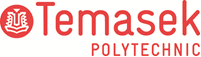

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Goh Seng Kang (2400312A)
* Tutorial Group                : PC04
* Tutor						    : Mr Emile SABASTIAN
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [234]:
## Import libraries
import pandas as pd
import numpy as np

# 1. Business Understanding
Goal: To provide Gamers with a model that can accurately predict the price of their desired custom gaming setup, and help them plan their expenses with an accurate price predictor that is easy to use.

# 2. Data Understanding

## 2.1 Load dataset

In [235]:
## Read *.csv file into pandas DataFrame
FILE_PATH = 'computer_prices_all.csv'
df = pd.read_csv(FILE_PATH)
df

,device_type,brand,model,release_year,os,form_factor,cpu_brand,cpu_model,cpu_tier,cpu_cores,...,resolution,refresh_hz,battery_wh,charger_watts,psu_watts,wifi,bluetooth,weight_kg,warranty_months,price
0,Desktop,Samsung,Samsung Forge XDI,2022,Windows,ATX,Intel,Intel i5-11129,3,12,...,2560x1440,90,0,0,750,Wi-Fi 6,5.1,11.00,36,1383.99
1,Laptop,Samsung,Samsung Pro KM8,2022,Windows,Mainstream,Intel,Intel i7-11114,4,12,...,1920x1080,90,56,120,0,Wi-Fi 6,5.3,2.03,12,2274.99
2,Desktop,Lenovo,Lenovo Strix BIE,2024,macOS,SFF,AMD,AMD Ryzen 5 5168,2,8,...,3440x1440,120,0,0,850,Wi-Fi 6,5.0,7.00,24,1879.99
3,Desktop,Dell,Dell Cube AXR,2024,Windows,ATX,AMD,AMD Ryzen 5 7550,2,6,...,3440x1440,120,0,0,650,Wi-Fi 6,5.2,6.00,36,1331.99
4,Laptop,Gigabyte,Gigabyte Pro IX1,2024,Linux,Gaming,AMD,AMD Ryzen 7 6230,5,16,...,2560x1600,90,80,90,0,Wi-Fi 6,5.2,1.50,12,2681.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Laptop,ASUS,ASUS Pro ZWL,2023,Windows,Mainstream,Intel,Intel i7-13721,4,12,...,1920x1080,144,90,180,0,Wi-Fi 6,5.1,1.87,24,1712.99
99996,Laptop,Lenovo,Lenovo Stealth 014,2018,Windows,Ultrabook,AMD,AMD Ryzen 5 5117,2,8,...,2560x1600,90,50,65,0,Wi-Fi 6,5.1,1.37,12,1258.99
99997,Laptop,ASUS,ASUS Zen LKD,2020,Windows,Mainstream,Intel,Intel i5-12677,2,6,...,2560x1600,120,99,180,0,Wi-Fi 6,4.2,1.17,12,1686.99
99998,Laptop,ASUS,ASUS Blade DH6,2020,Windows,Mainstream,AMD,AMD Ryzen 7 4590,4,12,...,2560x1600,120,60,90,0,Wi-Fi 6,5.3,1.70,24,2164.99


In [236]:
## Remove Laptop rows as we are only interested in Desktop prices, specifically gaming desktops
df = df[df['device_type'] != 'Laptop']
df

,device_type,brand,model,release_year,os,form_factor,cpu_brand,cpu_model,cpu_tier,cpu_cores,...,resolution,refresh_hz,battery_wh,charger_watts,psu_watts,wifi,bluetooth,weight_kg,warranty_months,price
0,Desktop,Samsung,Samsung Forge XDI,2022,Windows,ATX,Intel,Intel i5-11129,3,12,...,2560x1440,90,0,0,750,Wi-Fi 6,5.1,11.0,36,1383.99
2,Desktop,Lenovo,Lenovo Strix BIE,2024,macOS,SFF,AMD,AMD Ryzen 5 5168,2,8,...,3440x1440,120,0,0,850,Wi-Fi 6,5.0,7.0,24,1879.99
3,Desktop,Dell,Dell Cube AXR,2024,Windows,ATX,AMD,AMD Ryzen 5 7550,2,6,...,3440x1440,120,0,0,650,Wi-Fi 6,5.2,6.0,36,1331.99
5,Desktop,MSI,MSI Think KSG,2025,Windows,ATX,Intel,Intel i7-10369,5,16,...,2560x1440,90,0,0,1000,Wi-Fi 5,5.0,9.0,36,2751.99
6,Desktop,Apple,Apple Arena R5Q,2024,Windows,ATX,Apple,Apple M2,2,6,...,2560x1440,60,0,0,850,Wi-Fi 6,5.1,9.0,24,1609.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99989,Desktop,Apple,Apple Think KPV,2020,Windows,Full-Tower,Apple,Apple M3,4,12,...,3440x1440,60,0,0,1200,Wi-Fi 6,5.2,7.0,24,2121.99
99991,Desktop,Lenovo,Lenovo Station A87,2024,Windows,Micro-ATX,AMD,AMD Ryzen 5 4642,3,12,...,2560x1440,60,0,0,750,Wi-Fi 6,5.0,7.0,12,1595.99
99992,Desktop,MSI,MSI Creator 8TU,2018,macOS,SFF,Intel,Intel i5-13152,3,8,...,3840x2160,240,0,0,650,Wi-Fi 6E,5.0,4.0,24,2309.99
99994,Desktop,Lenovo,Lenovo Creator 2G4,2023,Linux,Mini-ITX,Intel,Intel i5-10539,3,12,...,3440x1440,120,0,0,850,Wi-Fi 5,4.2,7.0,24,1953.99


## 2.2 Summary Statistics

In [237]:
## Understand the type of variable for each column
df.dtypes

device_type             object
brand                   object
model                   object
release_year             int64
os                      object
form_factor             object
cpu_brand               object
cpu_model               object
cpu_tier                 int64
cpu_cores                int64
cpu_threads              int64
cpu_base_ghz           float64
cpu_boost_ghz          float64
gpu_brand               object
gpu_model               object
gpu_tier                 int64
vram_gb                  int64
ram_gb                   int64
storage_type            object
storage_gb               int64
storage_drive_count      int64
display_type            object
display_size_in        float64
resolution              object
refresh_hz               int64
battery_wh               int64
charger_watts            int64
psu_watts                int64
wifi                    object
bluetooth              float64
weight_kg              float64
warranty_months          int64
price   

In [238]:
## Check for missing data
df.isnull().sum()

device_type            0
brand                  0
model                  0
release_year           0
os                     0
form_factor            0
cpu_brand              0
cpu_model              0
cpu_tier               0
cpu_cores              0
cpu_threads            0
cpu_base_ghz           0
cpu_boost_ghz          0
gpu_brand              0
gpu_model              0
gpu_tier               0
vram_gb                0
ram_gb                 0
storage_type           0
storage_gb             0
storage_drive_count    0
display_type           0
display_size_in        0
resolution             0
refresh_hz             0
battery_wh             0
charger_watts          0
psu_watts              0
wifi                   0
bluetooth              0
weight_kg              0
warranty_months        0
price                  0
dtype: int64

There are no missing values, so no need to to handle them.

In [239]:
## Describe data distribution
## describe first 16 columns 
df.iloc[:, 0:16].describe(include='all')

,device_type,brand,model,release_year,os,form_factor,cpu_brand,cpu_model,cpu_tier,cpu_cores,cpu_threads,cpu_base_ghz,cpu_boost_ghz,gpu_brand,gpu_model,gpu_tier
count,40156,40156,40156,40156.000000,40156,40156,40156,40156,40156.000000,40156.000000,40156.000000,40156.000000,40156.000000,40156,40156,40156.000000
unique,1,10,39879,NaN,4,5,3,19160,NaN,NaN,NaN,NaN,NaN,4,49,NaN
top,Desktop,Lenovo,Samsung Station VI0,NaN,Windows,ATX,Intel,Apple M1,NaN,NaN,NaN,NaN,NaN,NVIDIA,Apple Integrated,NaN
freq,40156,6485,2,NaN,28882,15597,21131,572,NaN,NaN,NaN,NaN,NaN,21967,7529,NaN
mean,NaN,NaN,NaN,2022.316491,NaN,NaN,NaN,NaN,3.142818,10.724475,19.757346,2.828564,3.768578,NaN,NaN,3.163462
std,NaN,NaN,NaN,2.021924,NaN,NaN,NaN,NaN,1.373042,5.102002,9.818682,0.274608,0.290068,NaN,NaN,1.456368
min,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN,1.000000,4.000000,4.000000,2.400000,3.200000,NaN,NaN,1.000000
25%,NaN,NaN,NaN,2021.000000,NaN,NaN,NaN,NaN,2.000000,8.000000,12.000000,2.600000,3.600000,NaN,NaN,2.000000
50%,NaN,NaN,NaN,2023.000000,NaN,NaN,NaN,NaN,3.000000,10.000000,16.000000,2.800000,3.800000,NaN,NaN,3.000000
75%,NaN,NaN,NaN,2024.000000,NaN,NaN,NaN,NaN,4.000000,14.000000,24.000000,3.000000,4.000000,NaN,NaN,4.000000


In [240]:
## describe last 17 columns
df.iloc[:, 16:].describe(include='all')

,vram_gb,ram_gb,storage_type,storage_gb,storage_drive_count,display_type,display_size_in,resolution,refresh_hz,battery_wh,charger_watts,psu_watts,wifi,bluetooth,weight_kg,warranty_months,price
count,40156.000000,40156.000000,40156,40156.000000,40156.000000,40156,40156.000000,40156,40156.000000,40156.0,40156.0,40156.000000,40156,40156.000000,40156.000000,40156.000000,40156.000000
unique,NaN,NaN,4,NaN,NaN,6,NaN,4,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
top,NaN,NaN,NVMe,NaN,NaN,LED,NaN,1920x1080,NaN,NaN,NaN,NaN,Wi-Fi 6,NaN,NaN,NaN,NaN
freq,NaN,NaN,18083,NaN,NaN,12943,NaN,15104,NaN,NaN,NaN,NaN,18640,NaN,NaN,NaN,NaN
mean,6.416426,41.562705,NaN,900.092838,2.043505,NaN,27.823588,NaN,98.524330,0.0,0.0,678.654497,NaN,5.085315,8.280929,22.140950,1819.545284
std,4.101515,32.820845,NaN,772.362905,0.957378,NaN,3.355856,NaN,43.319296,0.0,0.0,194.055038,NaN,0.245282,3.056802,10.231462,532.550729
min,0.000000,8.000000,NaN,256.000000,1.000000,NaN,24.000000,NaN,60.000000,0.0,0.0,300.000000,NaN,4.200000,4.000000,12.000000,388.990000
25%,4.000000,16.000000,NaN,512.000000,1.000000,NaN,24.000000,NaN,60.000000,0.0,0.0,550.000000,NaN,5.000000,6.000000,12.000000,1433.990000
50%,6.000000,32.000000,NaN,512.000000,2.000000,NaN,27.000000,NaN,90.000000,0.0,0.0,650.000000,NaN,5.100000,8.000000,24.000000,1767.990000
75%,10.000000,64.000000,NaN,1024.000000,3.000000,NaN,32.000000,NaN,120.000000,0.0,0.0,750.000000,NaN,5.200000,10.000000,24.000000,2152.990000


In [241]:
## Drop unnecessary columns (Before EDA)
df = df.drop(columns=[
    'model',           # not needed as we are only predicting price range
    'device_type',     # not needed as only 1 unique value 'Desktop' exists after filtering
    'release_year',    # not needed as we want to only predict based on hardware specs
    'form_factor',     # not needed as we want to only predict based on hardware specs
    'battery_wh',      # not needed as only 1 unique value 0 exists after filtering
    'charger_watts',   # not needed as only 1 unique value 0 exists after filtering
    'weight_kg',       # not needed as we want to only predict based on hardware specs
    'brand'            # not needed as we want to only predict based on hardware specs
])

df


,os,cpu_brand,cpu_model,cpu_tier,cpu_cores,cpu_threads,cpu_base_ghz,cpu_boost_ghz,gpu_brand,gpu_model,...,storage_drive_count,display_type,display_size_in,resolution,refresh_hz,psu_watts,wifi,bluetooth,warranty_months,price
0,Windows,Intel,Intel i5-11129,3,12,24,2.8,3.8,NVIDIA,RTX 40 60,...,1,LED,27.0,2560x1440,90,750,Wi-Fi 6,5.1,36,1383.99
2,macOS,AMD,AMD Ryzen 5 5168,2,8,16,2.6,3.6,NVIDIA,RTX 40 50,...,2,LED,32.0,3440x1440,120,850,Wi-Fi 6,5.0,24,1879.99
3,Windows,AMD,AMD Ryzen 5 7550,2,6,12,2.6,3.6,AMD,RX 7000 60,...,2,IPS,27.0,3440x1440,120,650,Wi-Fi 6,5.2,36,1331.99
5,Windows,Intel,Intel i7-10369,5,16,32,3.2,4.3,NVIDIA,RTX 40 90,...,2,LED,24.0,2560x1440,90,1000,Wi-Fi 5,5.0,36,2751.99
6,Windows,Apple,Apple M2,2,6,6,2.6,3.5,Apple,Apple Integrated,...,2,VA,32.0,2560x1440,60,850,Wi-Fi 6,5.1,24,1609.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99989,Windows,Apple,Apple M3,4,12,12,3.0,4.0,Apple,Apple Integrated,...,2,Mini-LED,27.0,3440x1440,60,1200,Wi-Fi 6,5.2,24,2121.99
99991,Windows,AMD,AMD Ryzen 5 4642,3,12,24,2.8,3.6,NVIDIA,RTX 30 70,...,2,OLED,27.0,2560x1440,60,750,Wi-Fi 6,5.0,12,1595.99
99992,macOS,Intel,Intel i5-13152,3,8,16,2.8,3.8,NVIDIA,RTX 40 70,...,2,LED,27.0,3840x2160,240,650,Wi-Fi 6E,5.0,24,2309.99
99994,Linux,Intel,Intel i5-10539,3,12,24,2.8,3.8,NVIDIA,RTX 30 60,...,3,OLED,24.0,3440x1440,120,850,Wi-Fi 5,4.2,24,1953.99


In [242]:
##Drop uneeded rows
##Drop rows where GPU brand != NVIDIA or AMD as we are only interested in gaming desktops, which
# are likely to have discrete GPUs from these 2 brands
df = df[df['gpu_brand'].isin(['NVIDIA', 'AMD'])]

##Drop rows where CPU brand != Intel or AMD as these are the main CPU brands for gaming desktops
df = df[df['cpu_brand'].isin(['Intel', 'AMD'])]

In [243]:
##Describe data distribution for all 26 columns fully after dropping unnecessary columns
df.describe(include='all')

,os,cpu_brand,cpu_model,cpu_tier,cpu_cores,cpu_threads,cpu_base_ghz,cpu_boost_ghz,gpu_brand,gpu_model,...,storage_drive_count,display_type,display_size_in,resolution,refresh_hz,psu_watts,wifi,bluetooth,warranty_months,price
count,28375,28375,28375,28375.000000,28375.000000,28375.000000,28375.000000,28375.000000,28375,28375,...,28375.000000,28375,28375.000000,28375,28375.000000,28375.000000,28375,28375.000000,28375.000000,28375.000000
unique,4,2,16916,NaN,NaN,NaN,NaN,NaN,2,36,...,NaN,6,NaN,4,NaN,NaN,4,NaN,NaN,NaN
top,Windows,Intel,Intel i5-12199,NaN,NaN,NaN,NaN,NaN,NVIDIA,RTX 40 70,...,NaN,LED,NaN,1920x1080,NaN,NaN,Wi-Fi 6,NaN,NaN,NaN
freq,20446,16968,8,NaN,NaN,NaN,NaN,NaN,21967,2406,...,NaN,9149,NaN,10658,NaN,NaN,13125,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.071507,10.448000,20.698220,2.814301,3.755211,NaN,NaN,...,2.044581,NaN,27.809339,NaN,98.462802,678.361233,NaN,5.085085,22.181498,1771.136115
std,NaN,NaN,NaN,1.350317,4.904678,9.832944,0.270063,0.285817,NaN,NaN,...,0.959249,NaN,3.353634,NaN,43.331158,193.090432,NaN,0.245682,10.273413,494.722063
min,NaN,NaN,NaN,1.000000,4.000000,6.000000,2.400000,3.200000,NaN,NaN,...,1.000000,NaN,24.000000,NaN,60.000000,300.000000,NaN,4.200000,12.000000,388.990000
25%,NaN,NaN,NaN,2.000000,6.000000,12.000000,2.600000,3.500000,NaN,NaN,...,1.000000,NaN,24.000000,NaN,60.000000,550.000000,NaN,5.000000,12.000000,1408.990000
50%,NaN,NaN,NaN,3.000000,10.000000,18.000000,2.800000,3.700000,NaN,NaN,...,2.000000,NaN,27.000000,NaN,90.000000,650.000000,NaN,5.100000,24.000000,1726.990000
75%,NaN,NaN,NaN,4.000000,12.000000,24.000000,3.000000,4.000000,NaN,NaN,...,3.000000,NaN,32.000000,NaN,120.000000,750.000000,NaN,5.200000,24.000000,2093.990000


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

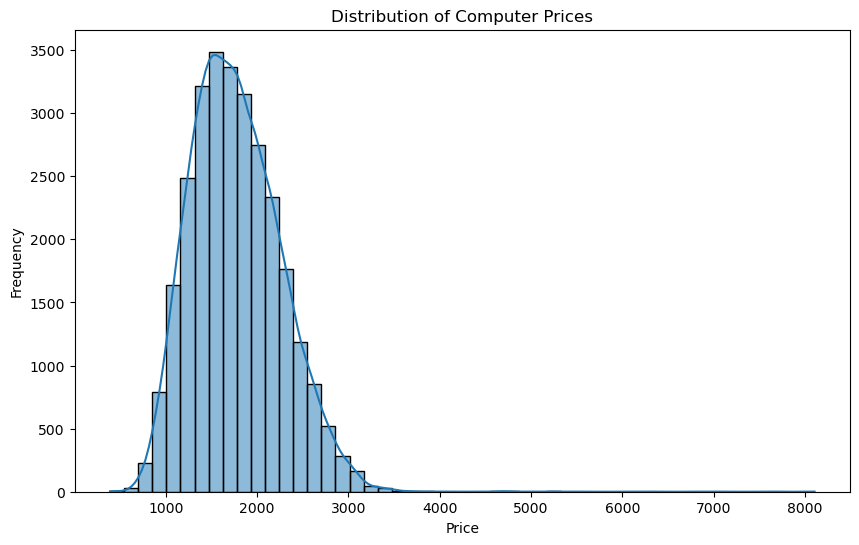

In [244]:
## Understanding distribution of target
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Computer Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


From this graph, many PCs range around the prices of 1000 - 3000, with the prices being extremely concentratred around the 1.5k - 2.5k mark.
There are some PCs, but little, that price above 3000

### 2.3.1.2 Understanding distribution of features

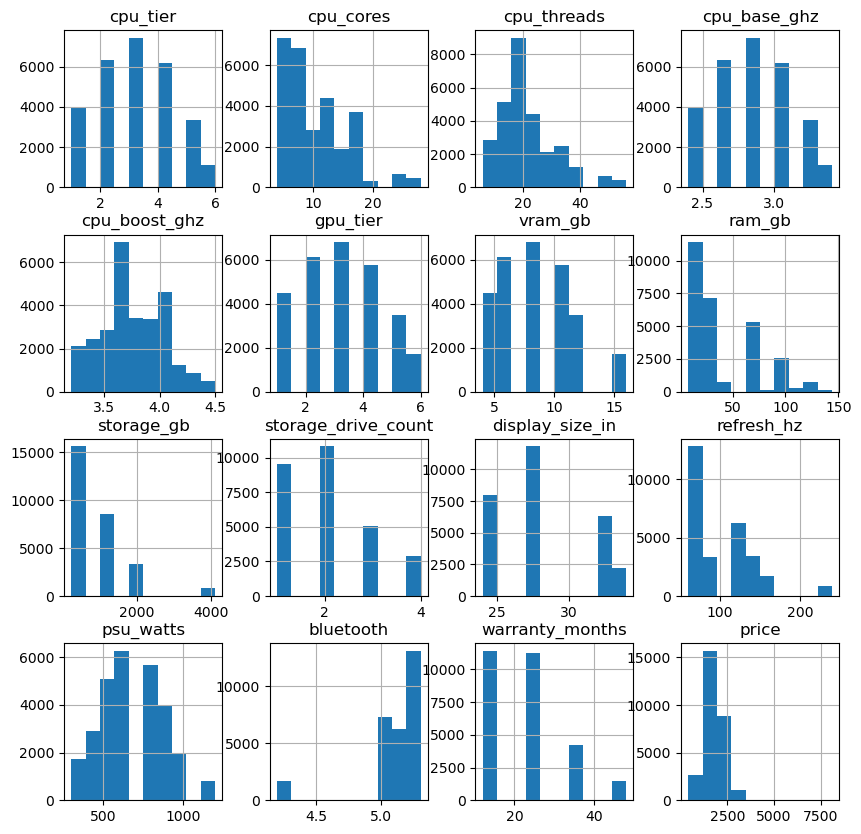

In [245]:
## Understanding distribution of features with histogram
df.hist(figsize=(10,10))
plt.show()

These histograms allow us to get important information, like the most common values for each feature, their distribution, and also potentially their range.

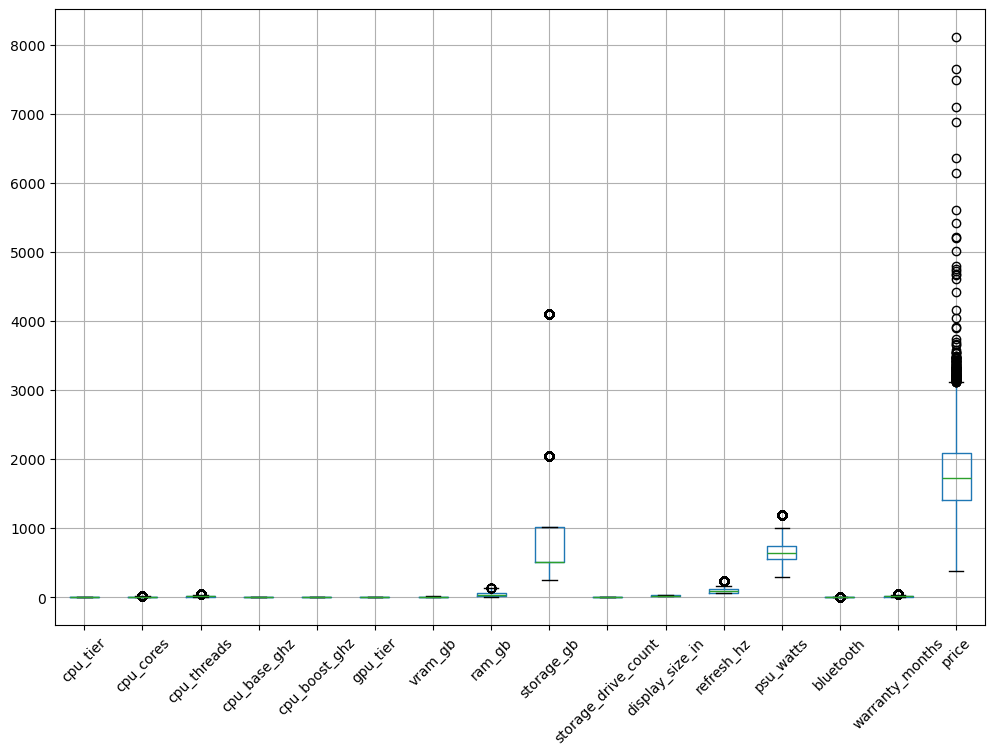

In [246]:
## Plot boxplot to identify outliers

df.boxplot(figsize=(12,8), rot=45)
plt.show()

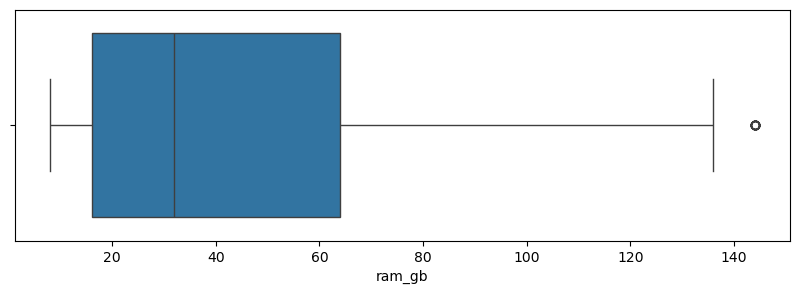

In [247]:
##Show singluar box plots for features with outliers
plt.figure(figsize=(10,3))
sns.boxplot(x=df['ram_gb'])
plt.show()

In this case, although the outliers are realistic values where people may acutally get huge number of RAM or storage, We will remove them as gamers often go for more realistic options, for eg. only 32GB of RAM, or 16-32 threads in their CPU, or uncommon for gamers to have PSU for more than 1k watts

However, we will keep the 2048GB storage option as 2048GB is still more common among gamers due to games requiring high storage, and also the 240 refresh_hz option as it is also common among competitive gamers.

As for the price range, although the outliers start at around $3200, i kept the limit to $3500, as i feel gamers would rarely go above the $3.5k mark just to game. As for the $3.2k - $3.5k outliers, there are many of them and it is concentrated, and the price is not normal, but a reasonable one, so i will keep it just to be safe.

In [248]:
##Remove outliers based on domain knowledge
## (Specific values obtained from Kaggle website or singlular box plot above)

df = df[
        (df['cpu_cores'] <= 20) &
        (df['cpu_threads'] <= 40) &
        (df['ram_gb'] <= 136) & 
        (df['storage_gb'] <= 2048) &
        (df['psu_watts'] <= 1000) &
        (df['bluetooth'] >= 5.0) & 
        (df['warranty_months'] <= 36) &
        (df['price'] <= 3500)
    ]


### 2.3.2 Understanding relationship between variables

In [249]:
## Understanding relationship between variables
## Calculate correlation matrix
col_num = df.select_dtypes(include=['float','int']).columns

df_corr = df[col_num].corr()
df_corr


,cpu_tier,cpu_cores,cpu_threads,cpu_base_ghz,cpu_boost_ghz,gpu_tier,vram_gb,ram_gb,storage_gb,storage_drive_count,display_size_in,refresh_hz,psu_watts,bluetooth,warranty_months,price
cpu_tier,1.000000,0.922903,0.920551,1.000000,0.930709,0.867911,0.856900,0.895996,0.003324,-0.008497,0.001151,0.007137,0.003285,0.010637,0.006647,0.747265
cpu_cores,0.922903,1.000000,0.997175,0.922903,0.858832,0.806120,0.801088,0.875477,0.002805,-0.007460,0.000878,0.006296,0.000736,0.011862,0.003653,0.698680
cpu_threads,0.920551,0.997175,1.000000,0.920551,0.856671,0.803765,0.798558,0.873037,0.003043,-0.007662,-0.000203,0.005592,0.000269,0.012091,0.003554,0.696876
cpu_base_ghz,1.000000,0.922903,0.920551,1.000000,0.930709,0.867911,0.856900,0.895996,0.003324,-0.008497,0.001151,0.007137,0.003285,0.010637,0.006647,0.747265
cpu_boost_ghz,0.930709,0.858832,0.856671,0.930709,1.000000,0.807834,0.797891,0.835260,0.001879,-0.002649,0.003264,0.006989,0.006126,0.009300,0.005900,0.695543
gpu_tier,0.867911,0.806120,0.803765,0.867911,0.807834,1.000000,0.993912,0.905498,0.002692,-0.005055,0.001589,0.001492,0.000077,0.009499,-0.000112,0.779085
vram_gb,0.856900,0.801088,0.798558,0.856900,0.797891,0.993912,1.000000,0.903875,0.002785,-0.004305,0.001690,0.001419,0.000777,0.009443,-0.000383,0.774380
ram_gb,0.895996,0.875477,0.873037,0.895996,0.835260,0.905498,0.903875,1.000000,-0.000747,-0.008520,0.002906,-0.000284,-0.001137,0.004545,0.003260,0.752942
storage_gb,0.003324,0.002805,0.003043,0.003324,0.001879,0.002692,0.002785,-0.000747,1.000000,0.003311,0.012494,0.002632,-0.006751,-0.005676,-0.011080,0.100496
storage_drive_count,-0.008497,-0.007460,-0.007662,-0.008497,-0.002649,-0.005055,-0.004305,-0.008520,0.003311,1.000000,0.005755,0.000822,0.003507,0.004461,0.003683,-0.006125


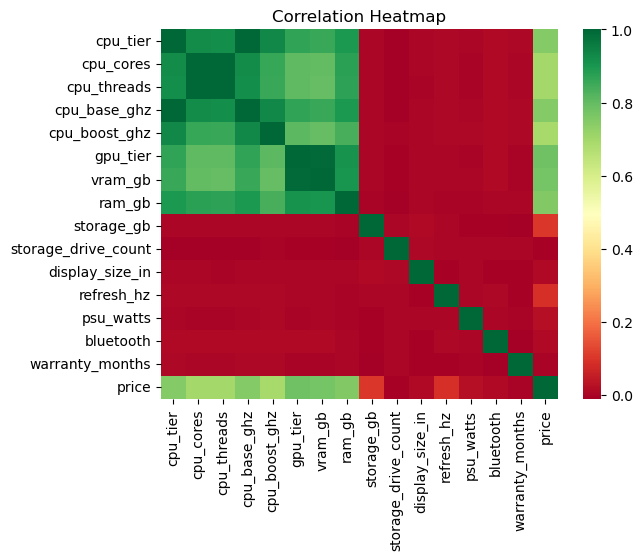

In [250]:
##Plot heatmap
sns.heatmap(df_corr, cmap='RdYlGn') ##RdYlGn: Red-yellow-green
plt.title('Correlation Heatmap')
plt.show()

As seen from the Correlation shown in the above 2 cells, features related to CPU, GPU and the RAM itself is the most correlated with the price.

However we will not be keeping all of these features later as some of the features also have high correlation with each other.
For example, CPU Tier is extremely well correlated with CPU Base ghz. So we will remove CPU Tier as CPU Base ghz is a better indicator as it has more distinct values

These values will also be used later in Feature engineering.

In [251]:
##Plot pairplot to understand relationships between variables

#sns.pairplot(df)
#plt.show()

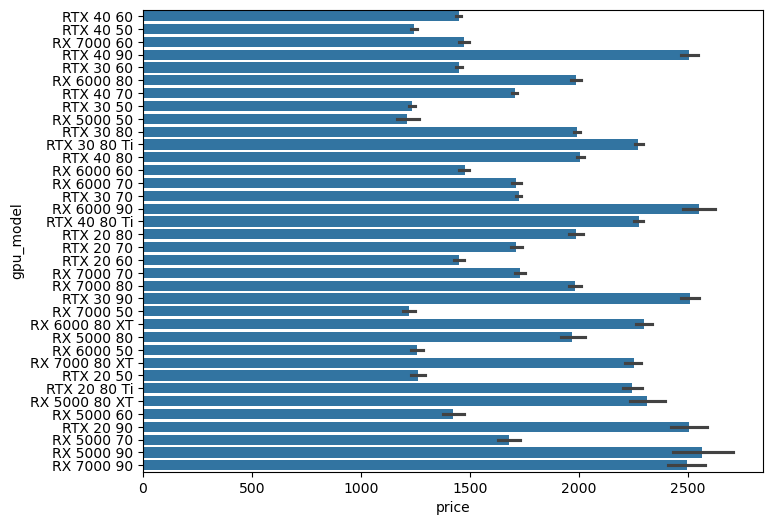

In [252]:
## Show bar plot for GPU brand vs Price
plt.figure(figsize=(8,6))
sns.barplot(y='gpu_model', x='price', data=df)
plt.show()

This graph was used to visuallise the relations between the different GPU's

In [253]:
## Print the list of GPU models

##RTX Series
rtx_series = df[df['gpu_model'].str.contains('RTX')]['gpu_model'].unique()
##Sort based on model number in ascending order (format: RTX XX XX (Ti))
rtx_series = sorted(rtx_series, key=lambda x: int(''.join(filter(str.isdigit, x))))

print("RTX Series GPU Models:")
for model in rtx_series:
    print(model)

##RX Series
rx_series = df[df['gpu_model'].str.contains('RX')]['gpu_model'].unique()
##Sort based on model number in ascending order (format: RX X000 XX (XT))
rx_series = sorted(rx_series, key=lambda x: int(''.join(filter(str.isdigit, x))))

print("\nRX Series GPU Models:")
for model in rx_series:
    print(f"{model} {(14 - len(model))*' '} ({model[:2]} {model[3]}{model[8]}00{' XT' if 'XT' in model else ''})")

RTX Series GPU Models:
RTX 20 50
RTX 20 60
RTX 20 70
RTX 20 80
RTX 20 80 Ti
RTX 20 90
RTX 30 50
RTX 30 60
RTX 30 70
RTX 30 80
RTX 30 80 Ti
RTX 30 90
RTX 40 50
RTX 40 60
RTX 40 70
RTX 40 80
RTX 40 80 Ti
RTX 40 90

RX Series GPU Models:
RX 5000 50      (RX 5500)
RX 5000 60      (RX 5600)
RX 5000 70      (RX 5700)
RX 5000 80      (RX 5800)
RX 5000 80 XT   (RX 5800 XT)
RX 5000 90      (RX 5900)
RX 6000 50      (RX 6500)
RX 6000 60      (RX 6600)
RX 6000 70      (RX 6700)
RX 6000 80      (RX 6800)
RX 6000 80 XT   (RX 6800 XT)
RX 6000 90      (RX 6900)
RX 7000 50      (RX 7500)
RX 7000 60      (RX 7600)
RX 7000 70      (RX 7700)
RX 7000 80      (RX 7800)
RX 7000 80 XT   (RX 7800 XT)
RX 7000 90      (RX 7900)


# 3. Data Preparation

## 3.1 Data Cleaning

We will keep the display specs, storage_gb, and the psu watts as although they have low correlation to price, these are elements that gamers will compare and spend time deciding on, hence it plays an important role in predicting a PC price.

In [254]:
## Clean data after EDA
## Remove uneeded CPU columns
## Keep CPU tier and CPU threads


df = df.drop(columns=[
    'cpu_boost_ghz',    # not needed as both are highly correlated with cpu base, and cpu base is a better indicator of performance as it has higher correlation with price
    'cpu_tier',  #not needed as cpu_base_ghz is a more specific indicator of performance and has similar correlation with price as cpu_tier
    'cpu_cores',     # not needed as we have cpu_threads, which is a better indicator of performance
    'cpu_brand',     # not needed as we are only are looking at raw CPU performance via cpu base ghz
    'cpu_model'      # not needed as we are only are looking at raw CPU performance via cpu base ghz
])


## Remove uneeded GPU columns
## Keep GPU model and GPU memory size
df = df.drop(columns=[
    'gpu_brand',      # not needed as we have the gpu model, which indicates the brand as well
    'gpu_tier'        # not needed as we have gpu model, which is a better indicator of performance
])

## Remove other uneeded columns


df = df.drop(columns=[
    'storage_drive_count',       # not needed as storage_type and storage_gb are sufficient
    'wifi',                      # Remove as low correlation with price and not strongly needed
    'bluetooth',
    'warranty_months'
])


df

,os,cpu_threads,cpu_base_ghz,gpu_model,vram_gb,ram_gb,storage_type,storage_gb,display_type,display_size_in,resolution,refresh_hz,psu_watts,price
0,Windows,24,2.8,RTX 40 60,6,16,NVMe,1024,LED,27.0,2560x1440,90,750,1383.99
2,macOS,16,2.6,RTX 40 50,4,8,NVMe,512,LED,32.0,3440x1440,120,850,1879.99
3,Windows,12,2.6,RX 7000 60,6,16,HDD,512,IPS,27.0,3440x1440,120,650,1331.99
5,Windows,32,3.2,RTX 40 90,16,96,NVMe,512,LED,24.0,2560x1440,90,1000,2751.99
11,Windows,10,2.6,RTX 30 60,6,16,NVMe,1024,IPS,32.0,2560x1440,120,750,1366.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99976,Windows,32,3.2,RTX 40 80 Ti,12,96,NVMe,256,IPS,27.0,1920x1080,90,750,1824.99
99983,Windows,12,2.6,RTX 30 70,8,16,NVMe,256,IPS,24.0,3840x2160,60,650,1645.99
99986,Linux,16,2.4,RTX 30 50,4,8,NVMe,1024,IPS,24.0,1920x1080,60,450,990.99
99991,Windows,24,2.8,RTX 30 70,8,32,Hybrid,512,OLED,27.0,2560x1440,60,750,1595.99


In [255]:
## Describe cleaned data distribution

## Describe categorical columns
df.describe(include='object')

,os,gpu_model,storage_type,display_type,resolution
count,22870,22870,22870,22870,22870
unique,4,36,4,6,4
top,Windows,RTX 40 70,NVMe,LED,1920x1080
freq,16424,2021,10295,7377,8614


In [256]:
## Describe numerical columns
df.describe(include=['float','int'])

,cpu_threads,cpu_base_ghz,vram_gb,ram_gb,storage_gb,display_size_in,refresh_hz,psu_watts,price
count,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000
mean,19.447486,2.788588,8.011106,36.378487,802.946742,27.812287,98.372584,662.418015,1725.609589
std,7.971116,0.247361,2.871824,27.587832,542.184791,3.349620,43.363635,173.320326,454.084329
min,6.000000,2.400000,4.000000,8.000000,256.000000,24.000000,60.000000,300.000000,388.990000
25%,12.000000,2.600000,6.000000,16.000000,512.000000,24.000000,60.000000,550.000000,1389.990000
50%,16.000000,2.800000,8.000000,32.000000,512.000000,27.000000,90.000000,650.000000,1691.990000
75%,24.000000,3.000000,10.000000,64.000000,1024.000000,32.000000,120.000000,750.000000,2030.990000
max,40.000000,3.200000,16.000000,112.000000,2048.000000,34.000000,240.000000,1000.000000,3493.990000


## 3.2 Train-Test Split

In [257]:
## Split data into train set and test set
y = df['price'] ## Select target column - Price
# price is numerical variable, so this is a regression problem

col_irrelevant = ['price'] ##List of irrelevant columns
X = df.drop(col_irrelevant, axis=1) ## Drop irrelevant columns // axis=1: drop columns, axis=2: drop rows

##One hot Encoding
X = pd.get_dummies(X,
                   drop_first=True) ## Remove redundant columns (first category)

X ## Display features DataFrame

,cpu_threads,cpu_base_ghz,vram_gb,ram_gb,storage_gb,display_size_in,refresh_hz,psu_watts,os_Linux,os_Windows,...,storage_type_NVMe,storage_type_SSD,display_type_LED,display_type_Mini-LED,display_type_OLED,display_type_QLED,display_type_VA,resolution_2560x1440,resolution_3440x1440,resolution_3840x2160
0,24,2.8,6,16,1024,27.0,90,750,False,True,...,True,False,True,False,False,False,False,True,False,False
2,16,2.6,4,8,512,32.0,120,850,False,False,...,True,False,True,False,False,False,False,False,True,False
3,12,2.6,6,16,512,27.0,120,650,False,True,...,False,False,False,False,False,False,False,False,True,False
5,32,3.2,16,96,512,24.0,90,1000,False,True,...,True,False,True,False,False,False,False,True,False,False
11,10,2.6,6,16,1024,32.0,120,750,False,True,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99976,32,3.2,12,96,256,27.0,90,750,False,True,...,True,False,False,False,False,False,False,False,False,False
99983,12,2.6,8,16,256,24.0,60,650,False,True,...,True,False,False,False,False,False,False,False,False,True
99986,16,2.4,4,8,1024,24.0,60,450,True,False,...,True,False,False,False,False,False,False,False,False,False
99991,24,2.8,8,32,512,27.0,60,750,False,True,...,False,False,False,False,True,False,False,True,False,False


In [258]:
## Initialise and train model
from sklearn.model_selection import train_test_split

## Split data into training and testing sets
test_size = 0.3 ## 30% for testing
random_state = 2025 ## For reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=test_size,
                                                    random_state=random_state)

# 4. Modelling

### 4.2 Train Model

In [259]:
## Use Linear Regression model
from sklearn.linear_model import LinearRegression

## Initialize model
linr = LinearRegression(fit_intercept=True) ## Whether to calculate the intercept for this model
linr.fit(X_train, y_train) ##Train model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [260]:
## Use Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor

##Initialize model
dtr = DecisionTreeRegressor(random_state=random_state)
dtr.fit(X_train, y_train) ## Train model

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,2025
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [261]:
## Use Gradient Boosting Regressor model
from sklearn.ensemble import GradientBoostingRegressor

##Initialize model
gbr = GradientBoostingRegressor(random_state=random_state)
gbr.fit(X_train, y_train) ## Train model

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [262]:
## Use Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor

##Initialize model
rfr = RandomForestRegressor(random_state=random_state)
rfr.fit(X_train, y_train) ## Train model

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# 5. Model Evaluation

In [263]:
## Evaluate model
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
y_pred_linr = linr.predict(X_test) ## Predict target for testing set
y_pred_dtr = dtr.predict(X_test) ## Predict target for testing set
y_pred_gbr = gbr.predict(X_test) ## Predict target for testing set
y_pred_rfr = rfr.predict(X_test) ## Predict target for testing set

accuracy_linr = linr.score(X_test, y_test)
accuracy_dtr = dtr.score(X_test, y_test)
accuracy_gbr = gbr.score(X_test, y_test)
accuracy_rfr = rfr.score(X_test, y_test)

## Print evaluation metrics
print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_linr)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_linr)}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test, y_pred_linr)}")
print(f"R-squared (R2 ): {r2_score(y_test, y_pred_linr)}")
print(f"Accuracy: {round(accuracy_linr * 100, 2)}%")


print("\nDecision Tree Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_dtr)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_dtr)}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test, y_pred_dtr)}")
print(f"R-squared (R2 ): {r2_score(y_test, y_pred_dtr)}")
print(f"Accuracy: {round(accuracy_dtr * 100, 2)}%")

print("\nGradient Boosting Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_gbr)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_gbr)}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test, y_pred_gbr)}")
print(f"R-squared (R2 ): {r2_score(y_test, y_pred_gbr)}")
print(f"Accuracy: {round(accuracy_gbr * 100, 2)}%")

print("\nRandom Forest Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_rfr)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_rfr)}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test, y_pred_rfr)}")
print(f"R-squared (R2 ): {r2_score(y_test, y_pred_rfr)}")
print(f"Accuracy: {round(accuracy_rfr * 100, 2)}%")

Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 139.62918565055853
Mean Squared Error (MSE): 33137.038972083035
Root Mean Squared Error (RMSE): 182.03581782737987
R-squared (R2 ): 0.8383697426500938
Accuracy: 83.84%

Decision Tree Regressor Model Evaluation:
Mean Absolute Error (MAE): 216.12213962979158
Mean Squared Error (MSE): 79090.00014575131
Root Mean Squared Error (RMSE): 281.22944395235595
R-squared (R2 ): 0.614228142468267
Accuracy: 61.42%

Gradient Boosting Regressor Model Evaluation:
Mean Absolute Error (MAE): 141.353276924089
Mean Squared Error (MSE): 34001.16729077084
Root Mean Squared Error (RMSE): 184.39405438020728
R-squared (R2 ): 0.834154843345104
Accuracy: 83.42%

Random Forest Regressor Model Evaluation:
Mean Absolute Error (MAE): 154.34121304162238
Mean Squared Error (MSE): 40022.77686652745
Root Mean Squared Error (RMSE): 200.0569340625999
R-squared (R2 ): 0.8047836522072913
Accuracy: 80.48%


In this case, we will use the Linear Regression Model to do Hyperparameters Tuning as it provides the Highest accuracy.

In [264]:
## Linear Regression is the best performing model from evaluation, so we tune it
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

param_dist_lr = {
    "fit_intercept": [True, False],
    "positive": [True, False],
    "n_jobs": [None, -1],
    "copy_X": [True, False],
    "tol" : [1e-3, 1e-2, 1e-1]
}

rs_lr = RandomizedSearchCV(
    estimator=LinearRegression(),
    param_distributions=param_dist_lr,
    n_iter=10,
    cv=5,
    scoring="r2",
    random_state=2025,
    n_jobs=-1
)

rs_lr.fit(X_train, y_train)

best_rs_params = rs_lr.best_params_
best_rs_lr = rs_lr.best_estimator_
print("Best Parameters:", best_rs_params)
print("Best Estimator:", best_rs_lr)

y_pred_rs_lr = best_rs_lr.predict(X_test)
print("Randomized Search Linear Regression R2:", rs_lr.score(X_test, y_test))
## 0.8383697426500938

Best Parameters: {'tol': 0.001, 'positive': False, 'n_jobs': -1, 'fit_intercept': False, 'copy_X': False}
Best Estimator: LinearRegression(copy_X=False, fit_intercept=False, n_jobs=-1, tol=0.001)
Randomized Search Linear Regression R2: 0.8383697426501153


In [265]:
## Check with existing data
X_unseen = pd.read_csv(FILE_PATH) ## For simplicity, we load back our original dataset
col_y = 'price' ## Target column name
 
## Convert to OHE Pandas dataframe
col_df_X = df.drop(col_y, axis=1).columns ## Select feature columns
col_ohe = X.columns.tolist() ## Select feature column names after OHE
 
X_unseen = pd.DataFrame(X_unseen, columns=col_df_X) ## Convert to Pandas dataframe
X_unseen = pd.get_dummies(X_unseen, drop_first=True) ## OHE
X_unseen = X_unseen.reindex(columns=col_ohe, fill_value=0) ## Provide OHE columns
 
## Predict
X_unseen['Predicted Price '] = best_rs_lr.predict(X_unseen)
X_unseen
 
## Compare with groundtruth
y_unseen = pd.read_csv(FILE_PATH) ## For simplicity, we load back our original dataset
X_unseen['Actual'] = y_unseen[col_y]
X_unseen

,cpu_threads,cpu_base_ghz,vram_gb,ram_gb,storage_gb,display_size_in,refresh_hz,psu_watts,os_Linux,os_Windows,...,display_type_LED,display_type_Mini-LED,display_type_OLED,display_type_QLED,display_type_VA,resolution_2560x1440,resolution_3440x1440,resolution_3840x2160,Predicted Price,Actual
0,24,2.8,6,16,1024,27.0,90,750,False,True,...,True,False,False,False,False,True,False,False,1404.070081,1383.99
1,24,2.6,10,64,512,16.0,90,0,False,True,...,False,False,True,False,False,False,False,False,1783.977280,2274.99
2,16,2.6,4,8,512,32.0,120,850,False,False,...,True,False,False,False,False,False,True,False,1568.296870,1879.99
3,12,2.6,6,16,512,27.0,120,650,False,True,...,False,False,False,False,False,False,True,False,1401.322127,1331.99
4,32,2.8,12,96,256,15.6,90,0,True,False,...,False,True,False,False,False,False,False,False,1969.886022,2681.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,24,2.6,8,32,2048,14.0,144,0,False,True,...,True,False,False,False,False,False,False,False,1367.513024,1712.99
99996,16,2.2,4,8,1024,14.0,90,0,False,True,...,True,False,False,False,False,False,False,False,717.511678,1258.99
99997,10,2.2,6,16,1024,14.0,120,0,False,True,...,False,False,True,False,False,False,False,False,1275.087489,1686.99
99998,24,2.6,8,32,256,15.6,120,0,False,True,...,False,False,True,False,False,False,False,False,1572.352875,2164.99


In [266]:
##Show dataframe for reference
df

,os,cpu_threads,cpu_base_ghz,gpu_model,vram_gb,ram_gb,storage_type,storage_gb,display_type,display_size_in,resolution,refresh_hz,psu_watts,price
0,Windows,24,2.8,RTX 40 60,6,16,NVMe,1024,LED,27.0,2560x1440,90,750,1383.99
2,macOS,16,2.6,RTX 40 50,4,8,NVMe,512,LED,32.0,3440x1440,120,850,1879.99
3,Windows,12,2.6,RX 7000 60,6,16,HDD,512,IPS,27.0,3440x1440,120,650,1331.99
5,Windows,32,3.2,RTX 40 90,16,96,NVMe,512,LED,24.0,2560x1440,90,1000,2751.99
11,Windows,10,2.6,RTX 30 60,6,16,NVMe,1024,IPS,32.0,2560x1440,120,750,1366.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99976,Windows,32,3.2,RTX 40 80 Ti,12,96,NVMe,256,IPS,27.0,1920x1080,90,750,1824.99
99983,Windows,12,2.6,RTX 30 70,8,16,NVMe,256,IPS,24.0,3840x2160,60,650,1645.99
99986,Linux,16,2.4,RTX 30 50,4,8,NVMe,1024,IPS,24.0,1920x1080,60,450,990.99
99991,Windows,24,2.8,RTX 30 70,8,32,Hybrid,512,OLED,27.0,2560x1440,60,750,1595.99


In [267]:
## Check with new data
#X_unseen = [["Windows", 12, 3.7, "RTX 30 70", 4, 16, "Hybrid", 1024, "LED", 32.0, "2560x1440", 144, 650]]
X_unseen = [["Windows", 20, 3.5, "RTX 30 50", 8, 32, "SSD", 1500, "FHD", 24.0, "1920x1080", 180, 640]]

col_y = ['price']
col_df_X = df.drop(col_y, axis=1).columns

X_unseen_df = pd.DataFrame(X_unseen, columns=col_df_X)

# Use training categories so dummies are created even for a single row
cat_cols = df.drop(col_y, axis=1).select_dtypes(include='object').columns
cat_levels = {c: df[c].unique() for c in cat_cols}

for c in cat_cols:
    X_unseen_df[c] = pd.Categorical(X_unseen_df[c], categories=cat_levels[c])

X_unseen_ohe = pd.get_dummies(X_unseen_df, drop_first=True)
X_unseen_ohe = X_unseen_ohe.reindex(columns=X.columns, fill_value=0)

## Predict
best_rs_lr.predict(X_unseen_ohe)

array([986.10634015])

## Iterative model development


In [268]:
## Further feature engineering / feature selection
## We will use KMeans clustering to explore and create a new feature
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Pick all numeric features
cluster_cols = [
    "cpu_threads",
    "cpu_base_ghz",
    "vram_gb",
    "ram_gb",
    "storage_gb",
    "display_size_in",
    "refresh_hz",
    "psu_watts"
]

scaler = MinMaxScaler()
X_cluster_feats = scaler.fit_transform(df[cluster_cols])

kmeans = KMeans(n_clusters=4, random_state=2025, n_init=10)
cluster_labels = kmeans.fit_predict(X_cluster_feats)

df_cluster = df.copy()
df_cluster["cluster"] = cluster_labels

In [269]:
## Get cluster labels for each data point
cluster_labels = kmeans.labels_

## Combine with original data in a new DataFrame
df_cluster['price'] = y.values
df_cluster[['cpu_threads_s','cpu_base_ghz_s','vram_gb_s','ram_gb_s','storage_gb_s','display_size_in_s','refresh_hz_s','psu_watts_s']] = X_cluster_feats


# 3D scatter plot
import plotly.express as px

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
fig = px.scatter_3d(
    df_cluster,
    x='vram_gb_s',
    y='ram_gb_s',
    z='cpu_base_ghz_s',
    color='cluster',
    title='K-Means Clusters',
    opacity=0.7,
    color_discrete_sequence=colors
)
fig.update_traces(marker=dict(symbol='circle', size=6))
fig.show()

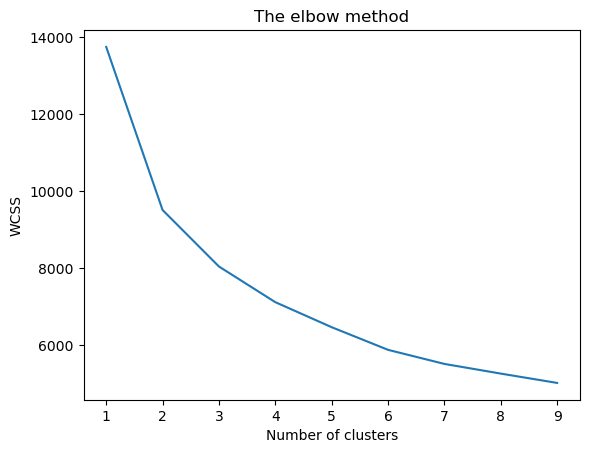

In [270]:
## Further feature engineering / feature selection
## Elbow method to find optimal number of clusters
WCSS = []

for clusters in range(1, 10):
    kmeans = KMeans(n_clusters=clusters, random_state=2025, n_init=10)
    kmeans.fit(X_cluster_feats)
    WCSS.append(kmeans.inertia_)

plt.plot(range(1, 10), WCSS)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [273]:
from sklearn.decomposition import PCA

# Apply PCA (reduce to 4 components for 3D plot)
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_cluster_feats)

# Create DataFrame for plotting
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])
df_pca['cluster'] = cluster_labels  # from kmeans_3

# Custom colors for distinct clusters
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plot in 3D using Plotly
fig = px.scatter_3d(
    df_pca,
    x='PC1', y='PC2', z='PC3',
    color='cluster',
    title='K-Means Clusters in PCA Space (3D)',
    opacity=0.8,
    color_discrete_sequence=colors
)

fig.update_traces(marker=dict(symbol='circle', size=6))
fig.show()

In [275]:
df_cluster.describe()

,cpu_threads,cpu_base_ghz,vram_gb,ram_gb,storage_gb,display_size_in,refresh_hz,psu_watts,price,cluster,cpu_threads_s,cpu_base_ghz_s,vram_gb_s,ram_gb_s,storage_gb_s,display_size_in_s,refresh_hz_s,psu_watts_s
count,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000
mean,19.447486,2.788588,8.011106,36.378487,802.946742,27.812287,98.372584,662.418015,1725.609589,1.325404,0.395514,0.485735,0.334259,0.272870,0.305216,0.381229,0.213181,0.517740
std,7.971116,0.247361,2.871824,27.587832,542.184791,3.349620,43.363635,173.320326,454.084329,0.896311,0.234445,0.309202,0.239319,0.265268,0.302558,0.334962,0.240909,0.247600
min,6.000000,2.400000,4.000000,8.000000,256.000000,24.000000,60.000000,300.000000,388.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,2.600000,6.000000,16.000000,512.000000,24.000000,60.000000,550.000000,1389.990000,1.000000,0.176471,0.250000,0.166667,0.076923,0.142857,0.000000,0.000000,0.357143
50%,16.000000,2.800000,8.000000,32.000000,512.000000,27.000000,90.000000,650.000000,1691.990000,1.000000,0.294118,0.500000,0.333333,0.230769,0.142857,0.300000,0.166667,0.500000
75%,24.000000,3.000000,10.000000,64.000000,1024.000000,32.000000,120.000000,750.000000,2030.990000,2.000000,0.529412,0.750000,0.500000,0.538462,0.428571,0.800000,0.333333,0.642857
max,40.000000,3.200000,16.000000,112.000000,2048.000000,34.000000,240.000000,1000.000000,3493.990000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Baseline vs Feature Engineering
We compare model performance before and after adding the engineered feature(s)
to show measurable improvement and justify the change.

Normal linr model accuracy: 0.8383697426500938 (83.83%)

In [276]:
## Split data into train set and test set
y_cluster = df_cluster['price'] ## Select target column - Price
# price is numerical variable, so this is a regression problem

col_irrelevant = ['price'] ##List of irrelevant columns
X_cluster = df_cluster.drop(col_irrelevant, axis=1) ## Drop irrelevant columns // axis=1: drop columns, axis=2: drop rows

##One hot Encoding
X_cluster = pd.get_dummies(X_cluster,
                   drop_first=True) ## Remove redundant columns (first category)

X_cluster ## Display features DataFrame

,cpu_threads,cpu_base_ghz,vram_gb,ram_gb,storage_gb,display_size_in,refresh_hz,psu_watts,cluster,cpu_threads_s,...,storage_type_NVMe,storage_type_SSD,display_type_LED,display_type_Mini-LED,display_type_OLED,display_type_QLED,display_type_VA,resolution_2560x1440,resolution_3440x1440,resolution_3840x2160
0,24,2.8,6,16,1024,27.0,90,750,1,0.529412,...,True,False,True,False,False,False,False,True,False,False
2,16,2.6,4,8,512,32.0,120,850,0,0.294118,...,True,False,True,False,False,False,False,False,True,False
3,12,2.6,6,16,512,27.0,120,650,1,0.176471,...,False,False,False,False,False,False,False,False,True,False
5,32,3.2,16,96,512,24.0,90,1000,2,0.764706,...,True,False,True,False,False,False,False,True,False,False
11,10,2.6,6,16,1024,32.0,120,750,0,0.117647,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99976,32,3.2,12,96,256,27.0,90,750,2,0.764706,...,True,False,False,False,False,False,False,False,False,False
99983,12,2.6,8,16,256,24.0,60,650,1,0.176471,...,True,False,False,False,False,False,False,False,False,True
99986,16,2.4,4,8,1024,24.0,60,450,1,0.294118,...,True,False,False,False,False,False,False,False,False,False
99991,24,2.8,8,32,512,27.0,60,750,1,0.529412,...,False,False,False,False,True,False,False,True,False,False


In [277]:
## Initialise and train model

## Split data into training and testing sets
X_cluster_train = X_cluster.loc[X_train.index]
X_cluster_test  = X_cluster.loc[X_test.index]
y_cluster_train = y_cluster.loc[y_train.index]
y_cluster_test  = y_cluster.loc[y_test.index]

In [281]:
## Initialize model
linr = LinearRegression(fit_intercept=True) ## Whether to calculate the intercept for this model
linr.fit(X_cluster_train, y_cluster_train) ##Train model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [282]:
gbr = GradientBoostingRegressor(random_state=random_state)
gbr.fit(X_cluster_train, y_cluster_train) ## Train model

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [284]:
## Evaluate model
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
y_cluster_pred_linr = linr.predict(X_cluster_test) ## Predict target for testing set

accuracy_cluster_linr = linr.score(X_cluster_test, y_cluster_test)

## Print evaluation metrics
print("Linear Regression Model Evaluation (After Feature Engineering):")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_cluster_test, y_cluster_pred_linr)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_cluster_test, y_cluster_pred_linr)}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_cluster_test, y_cluster_pred_linr)}")
print(f"R-squared (R2 ): {r2_score(y_cluster_test, y_cluster_pred_linr)}")
print(f"Accuracy: {round(accuracy_cluster_linr * 100, 2)}%")

Linear Regression Model Evaluation (After Feature Engineering):
Mean Absolute Error (MAE): 139.35182697319706
Mean Squared Error (MSE): 33009.72233780216
Root Mean Squared Error (RMSE): 181.68577912924874
R-squared (R2 ): 0.8389907462461327
Accuracy: 83.9%


As seen:
Before feature engineering: 0.8383697426500938 (83.83%)
Aft feature engineering: 0.8389907462461327 (83.89%)
